# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# 1. Read the dataset given in file named 'bigcity.csv'.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
data = pd.read_csv("bigcity.csv")

In [35]:
data.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# 2. Explore the shape of dataset (0.5 points)
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [36]:
data.shape

(49, 3)

# 3. Check the dataset for any missing values and also print out the correlation matrix (0.5 points)
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [37]:
data.isnull().values.any()

False

In [38]:
data.corr()

,Unnamed: 0,u,x
Unnamed: 0,1.000000,-0.024788,-0.047890
u,-0.024788,1.000000,0.981742
x,-0.047890,0.981742,1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 4. Split data into train, test sets (0.5 points)
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X = data.u
X = X.values.reshape(len(X),1)
Y = data.x
Y = Y.values.reshape(len(Y),1)

In [41]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.20 , random_state = 1)

# 5. Find coefficients & intercept (0.5 points)
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x_train , y_train)

b0 = model.coef_
b1 = model.intercept_

print("b0 : " ,b0 , "b1 : " , b1)

b0 :  [[1.15945123]] b1 :  [9.71845532]


# 6.  Linear Relationship between feature and target (0.5 points)
Plot the line with b1 and b0 as slope and y-intercept.

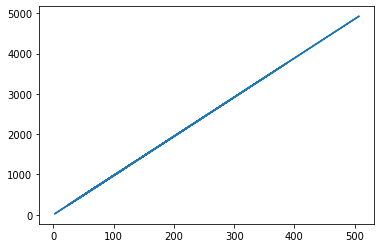

In [43]:
plt.plot(x_train , b0 + b1 * x_train)

# 7. Evaluation of model with scikit-learn (0.5 points)
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [44]:
y_pred = model.predict(x_test)

In [45]:
from sklearn.metrics import mean_squared_error , r2_score

import math

In [46]:
mse = mean_squared_error(y_test , y_pred)
rms = math.sqrt(mse)

In [47]:
r2score = r2_score(y_test,y_pred)

In [48]:
print("root mean square : {} and R^2 : {} ".format(rms,r2score))

root mean square : 23.385235190249123 and R^2 : 0.9181922560396981 


# 8. Calculate the accuracy of the model for both training and test data set (0.5 points)

Hint: .score() function

In [49]:
from sklearn import metrics

In [50]:
print("Accuracy of training : ",model.score(x_train , y_train ))

Accuracy of training :  0.9682175540860046


In [51]:
print("Accuracy of test : ",model.score(x_test , y_test ))

Accuracy of test :  0.9181922560396981
